# Abstract

In this era of the digital age, online hate speech residing in social media networks can influence hate violence or even crimes towards a certain group of people. Hate related attacks targetted at specific groups of people are at a 16-year high in the United States of America, statistics released by the FBI reported. [[1]](https://www.nytimes.com/2019/11/12/us/hate-crimes-fbi-report.html) Therefore, there is a growing need to eradicate hate speech as much as possible through automatic detection to ease the load on moderators. 

Datasets were obtained from Reddit and a white supremacist forum, Gab where there contains human labelled comments that are determined as hate speech related. [[2]](https://github.com/jing-qian/A-Benchmark-Dataset-for-Learning-to-Intervene-in-Online-Hate-Speech)

Multiple modelling approaches will be explored, such as machine learning models and even state-of-the-art deep learning models. F1 score and recall will be the metrics to be prioritised in model comparison. In the event where both are the same, actual False Negatives and False Postive numbers will be looked at. 

# Problem Statement

In this digital age, online hate speech has increased over the past few years. Studies has shown that online hate speech can lead to offline violence towards a certain group. [[3]](https://phys.org/news/2019-10-online-speech-crimes-minorities.html) 

In some cases, social media can lead to a more direct role, in this case the New Zealand shooting incident was broadcasted live on Facebook.[[4]](https://www.nytimes.com/2019/03/14/world/asia/new-zealand-shooting-updates-christchurch.html)

Due to the societal concern and how widespread hate speech is becoming on the Internet  and especially on social media, there is a strong need to classify online hate speech comments that are considered hate speech. [[5]](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0221152#sec001)

In [176]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import regex as re
import numpy as np

%matplotlib inline
plt.style.use('seaborn')

# Load dataset

## Reddit data

Taken from 10 subreddits:

- r/DankMemes --> exceptionally unique or odd memes.
- r/Imgoingtohellforthis --> extremely bad stuff
- r/KotakuInAction --> discussion on all things geeky
- r/MensRights 
- r/MetaCanada
- r/MGTOW --> Men Go Their Own Way
- r/PussyPass 
- r/PussyPassDenied,
- r/The_Donald 
- r/TumblrInAction.

Hate speech definition: Hate speech is speech that attacks a person or a group on the basis of protected attributes such as race, religion, ethnic origin, national origin, sex, disability, sexual orientation, or gender identity. [[6]](https://en.wikipedia.org/wiki/Hate_speech)

Hate speech categories:
- misogyny --> aimed at women
- misandry --> aimed at men
- racism --> aimed at specific race
- sexual orientation
- religion
- disability

In [6]:
df = pd.read_csv('./datasets/A-Benchmark-Dataset-for-Learning-to-Intervene-in-Online-Hate-Speech/data/reddit.csv')

In [7]:
df.head(10)

,id,text,hate_speech_idx,response
0,1. e8q18lf\n2. \te8q9w5s\n3. \t\te8qbobk\n4. \...,1. A subsection of retarded Hungarians? Ohh bo...,[1],"[""I don't see a reason why it's okay to insult..."
1,1. e9c6naz\n2. \te9d03a5\n3. \t\te9d8e4d\n,"1. > ""y'all hear sumn?"" by all means I live i...",[3],['Persons with disabilities is the accepted te...
2,1. e84rl2i\n2. \te84w60l\n3. \t\te8544rn\n4. \...,1. wouldn't the defenders or whatever they are...,NaN,NaN
3,1. e7kq72n\n2. \te7m24ar\n,1. Because the Japanese aren't retarded and kn...,[1],"[""It's not right for anyone of any gender to b..."
4,1. e7hdgoh\n2. \te7iyj6a\n3. \t\te7j6iho\n4. \...,1. That might be true if we didn't have an exa...,"[2, 3]","[""You shouldn't be bringing up sensitive topic..."
5,1. e7q9xg7\n2. \te7qcprz\n3. \t\te7qdfo2\n4. \...,"1. Why, what is the point of making all of tha...",[8],"['The term you have used is unnecessary, and m..."
6,1. e0br5tz\n2. \te0bt99d\n3. \t\te0bwjp8\n4. \...,1. Where in the fuck do these women get these ...,[8],"[""I can tell you aren't meaning to be offensiv..."
7,1. e97pz81\n2. \te980g66\n3. \t\te9a5jz1\n4. \...,"1. Wow, this cunt is a fucking trip. Men give ...",[1],"['I know you are expressing anger, but the ter..."
8,1. e6zs562\n2. \te707fwt\n3. \t\te70zezj\n,"1. Listen to that wording in the ""article"" aka...",[1],['The term you have used is unnecessary and of...
9,1. e61dcm0\n2. \te61i6z6\n,1. This is the same kind of bullshit reporting...,[2],['The term you have used is very offensive to ...


In [276]:
df.fillna('0', inplace=True)

In [352]:
df.tail()

,id,text,hate_speech_idx,response
5015,1. e90fta8\n2. \te90g8px\n3. \t\te90jlq5\n4. \...,1. Who does she claim as *her people*?\n2. \tI...,[8],['its inappropriate to use the word faggot as ...
5016,1. e9b7mn2\n2. \te9bv6ir\n,1. Here's what's going to happen: Broward is ...,0,0
5017,1. e7q8ilv\n2. \te7qddqq\n3. \t\te7qstbc\n4. \...,1. Oh boy...so here comes a long venting post ...,"[1, 4]","[""using the word 'nigger' is a direct attack t..."
5018,1. dwp8jut\n,"1. OP, stop being a faggot and post videos nex...",[1],"[""using the words 'faggot fuckers' is offensiv..."
5019,1. e76148j\n2. \te76uzdz\n3. \t\te772r42\n4. \...,"1. In this 20 minute long video, Top Hate and ...",[2],"[""Using the word 'retard' is offensive to the..."


In [128]:
df.loc[4, 'hate_speech_idx']

'[2, 3]'

In [353]:
test = df.loc[4, 'id'].split(sep='\n')
hate_id = re.findall(r"\S+", df.loc[4, 'id'])

In [354]:
test

['1. e7hdgoh',
 '2. \te7iyj6a',
 '3. \t\te7j6iho',
 '4. \t\t\te7m2412',
 '5. \t\t\t\te7m5t9f',
 '6. \t\t\t\t\te7mphok',
 '7. \t\t\t\t\t\te7muj9q',
 '8. \t\t\t\t\t\t\te7mz1vg',
 '']

In [358]:
re.findall(r"\S+", test[7])

['8.', 'e7mz1vg']

In [351]:
hate_id

['1.',
 'e7hdgoh',
 '2.',
 'e7iyj6a',
 '3.',
 'e7j6iho',
 '4.',
 'e7m2412',
 '5.',
 'e7m5t9f',
 '6.',
 'e7mphok',
 '7.',
 'e7muj9q',
 '8.',
 'e7mz1vg']

In [346]:
df.loc[0,'text']

"1. A subsection of retarded Hungarians? Ohh boy. brace for a livid Bulbasaur coming in here trying to hate a hole in some of her stupider countrymen.\n2. \tHiii. Just got off work. 444 is mainly the typa guys you imagine writing for US stupid sites, but basically they just try to fit in with the Western European and US big city hipsters.   Rich kids from Budapest who feel they are brave journalistic heroes.  \n3. \t\twow i guess soyboys are the same in every country\n4. \t\t\tOwen Benjamin's soyboy song goes for every country and that's why it's so amazing. \n"

In [119]:
print(df.loc[4, 'response'])

["You shouldn't be bringing up sensitive topics. People have went through these kinds of things. To take them lightly is not acceptable.", 'Reddit is for everyone people we ask that you refrain from such hateful terms. Just a heads up, thank you for your understanding.', 'Do not use a disability to voice your opinions.']


In [140]:
print(test)

["1. That might be true if we didn't have an example of a whole segment of the US population blindly screaming for the head of a man based on accusations from a demonstrably unreliable witness about an event 35+ years ago which nobody could even begin to corroborate, not even her own witnesses.  It's a scary time for men because of fuckwits like the Author.", "2. \tHonestly, I believe that Kavanaugh probably did do what she says he did. Especially after more information about the heavy drinking and bar fights came out.  Here's the thing. The evidence that was presented (ie: none, just testimonies) over the last few weeks would be nowhere near enough to convict him of anything (even if it was still prosecutable). So why the fuck does anyone think it should bar him from a job on the supreme court? Can we please give him the same presumption of innocence anyone should get until he's actually proven guilty? It may seem unfair to some (for some retarded reason), but I'd personally love for 

In [157]:
 test[5][:3]

'6. '

In [164]:
re.search('1', test[0][:3])

<regex.Match object; span=(0, 1), match='1'>

In [233]:
df.loc[4, 'hate_speech_idx']

'[2, 3]'

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 4 columns):
id                 5020 non-null object
text               5020 non-null object
hate_speech_idx    3847 non-null object
response           3847 non-null object
dtypes: object(4)
memory usage: 157.0+ KB


### Clean data

In [486]:
df_red = pd.DataFrame(columns=['id', 'text', 'hate', 'response'])
dict_rejected = {'id': [], 'text': [], 'hate': [], 'response': []}

In [490]:
def expand_comments(comm_id, comment_str, hate_str, resp):
    #init all_comments dict for storing text & hate label along with their other info
    all_comments = {'id': [], 'text': [], 'hate': [], 'response': []}

    # id
    comm_id_lst = re.findall(r"\S+", comm_id)
    for comm_id in comm_id_lst:
        if len(comm_id) > 3:
            all_comments['id'].append(comm_id)
    
    #comment
    comment_list = comment_str.split(sep='\n')
    
    #hate label
    if hate_str != '0':
        hate_id = re.findall(r"\d+", hate_str)

    for comment in comment_list:
        if comment != '':
            #ignoring all tabs for comments
#             comment = ' '.join(re.findall(r"\S+", comment))
            all_comments['text'].append(comment)
            all_comments['response'].append(resp)
            is_hate = False
            #if hate_str is 0 skip to next comment
    a        if hate_str == '0':
                all_comments['hate'].append(0)
                #if hate_str is 0 continue to next iteration
                continue 
            for hate in hate_id:    
                if re.search(hate, comment[:3]): #only the first 3 chars
                    is_hate=True
            if is_hate:
                all_comments['hate'].append(1)
            else:
                all_comments['hate'].append(0)
                
    # handle different length text and id
    if len(all_comments['text']) != len(all_comments['id']):
        #when # of comments diff from # of ids
        dict_rejected['id'].append(all_comments['id'])
        dict_rejected['text'].append(all_comments['text'])
        dict_rejected['hate'].append(all_comments['hate'])
        dict_rejected['response'].append(all_comments['response'])
        all_comments = {'id': [], 'text': [], 'hate': [], 'response': []}
        return all_comments #return empty dict
    
    return all_comments

In [491]:
all_comments = expand_comments(df.loc[4, 'id'], df.loc[4,'text'], df.loc[4, 'hate_speech_idx'], df.loc[4, 'response'])

In [492]:
dict_rejected

{'id': [], 'text': [], 'hate': [], 'response': []}

In [443]:
all_comments

{'id': ['e7hdgoh',
  'e7iyj6a',
  'e7j6iho',
  'e7m2412',
  'e7m5t9f',
  'e7mphok',
  'e7muj9q',
  'e7mz1vg'],
 'text': ["1. That might be true if we didn't have an example of a whole segment of the US population blindly screaming for the head of a man based on accusations from a demonstrably unreliable witness about an event 35+ years ago which nobody could even begin to corroborate, not even her own witnesses.  It's a scary time for men because of fuckwits like the Author.",
  "2. \tHonestly, I believe that Kavanaugh probably did do what she says he did. Especially after more information about the heavy drinking and bar fights came out.  Here's the thing. The evidence that was presented (ie: none, just testimonies) over the last few weeks would be nowhere near enough to convict him of anything (even if it was still prosecutable). So why the fuck does anyone think it should bar him from a job on the supreme court? Can we please give him the same presumption of innocence anyone should 

In [493]:
for index, row in df.iterrows():
    all_comments = expand_comments(row['id'], row['text'], row['hate_speech_idx'], row['response'])
    df_red = pd.concat([df_red, pd.DataFrame(all_comments)], ignore_index=True)

In [489]:
all_comments

{'id': ['e84rl2i',
  'e84w60l',
  'e8544rn',
  'e85ifut',
  'e85nvr7',
  'e85t0ci',
  'e863k57',
  'e87gg63',
  'e886ajt',
  'e89jo0f',
  'e8a791j'],
 'text': ["1. wouldn't the defenders or whatever they are as a group be the most diverse group ? Since you know it has a blind dude ,  orphan , black man , woman  and all of their supporting cast ?   &#x200B;  I also believe all the Marvel stuff is going to get canceled on Netflix because next year Disney is launching their own streaming platform and will want as many characters as it can get for shows on that",
  "2. \t'inclusive' = not white",
  '3. \t\t“Harvard is working to be more inclusive.”  “Oh, so they’re accepting more students next year?”  “No, I meant they’re literally being racist against Asians.”  👌',
  '4. \t\t\t "Oh yeah and that lawsuit?  Going to benefit whites in the long run.  Unacceptable in our view."',
  '5. \t\t\t\t- ***A***nti-***C***aucasian ***L***itigation ***U***nion.',
  "6. \t\t\t\t\tACLU: We Don't Hate Reli

In [460]:
len(dict_rejected['id'])

15

In [455]:
re.findall(r"\W+[^0-9][^A-Za-z]", dict_rejected['text'][2])

['!! ']

In [501]:
df_red.shape

(22270, 4)

__Save to csv__

In [506]:
pd.DataFrame(dict_rejected).to_csv('./assets/reddit_rejected.csv')

In [502]:
df_red.to_csv('./assets/reddit_all.csv')

In [468]:
df_red.loc[22260, 'text']

'2. \tNo clue whos these e-celebs are, but at this point in time,  > the need to get along with progressives and how such a feat is very much possible.  is something only a fucking retard would say.'

In [8]:
df.loc[3, 'text']

"1. Because the Japanese aren't retarded and know that *fictional characters* aren't owed anything, much less dignity.\n2. \tJapan doesn't shy* away from a lot of things. Male characters smack around women for the humor of it too. And something like Seven Deadly Sins has the main character frequently groping women, stealing her panties [while she's wearing them], etc.\n"

In [9]:
df.loc[3, 'response']

'["It\'s not right for anyone of any gender to be hurting the opposite gender, whether it be male or female.", \'We ask that you refrain from using such terms to express your opinions of others intelligence. Your cooperation is appreciated.\', \'Please stop using harmful words pertaining to a disability to insult cultures.\']'

In [10]:
print(df.loc[4, 'text'])

1. That might be true if we didn't have an example of a whole segment of the US population blindly screaming for the head of a man based on accusations from a demonstrably unreliable witness about an event 35+ years ago which nobody could even begin to corroborate, not even her own witnesses.  It's a scary time for men because of fuckwits like the Author.
2. 	Honestly, I believe that Kavanaugh probably did do what she says he did. Especially after more information about the heavy drinking and bar fights came out.  Here's the thing. The evidence that was presented (ie: none, just testimonies) over the last few weeks would be nowhere near enough to convict him of anything (even if it was still prosecutable). So why the fuck does anyone think it should bar him from a job on the supreme court? Can we please give him the same presumption of innocence anyone should get until he's actually proven guilty? It may seem unfair to some (for some retarded reason), but I'd personally love for the pr

In [28]:
len(df.loc[4, 'text'].split('\n'))

9

In [11]:
df.loc[4, 'response']

'["You shouldn\'t be bringing up sensitive topics. People have went through these kinds of things. To take them lightly is not acceptable.", \'Reddit is for everyone people we ask that you refrain from such hateful terms. Just a heads up, thank you for your understanding.\', \'Do not use a disability to voice your opinions.\']'

In [12]:
#non hate speech
df.isnull().sum()

id                    0
text                  0
hate_speech_idx    1173
response           1173
dtype: int64

In [13]:
df.shape

(5020, 4)

In [14]:
df.loc[7, 'text']

'1. Wow, this cunt is a fucking trip. Men give out opinions because, last time I check, men built everything around us. When women have accomplished what men have, then they can have a fucking opinion that matters as much as men’s does. I am so glad she lost. This misandrist bullshit is fucking insane.\n2. \tNo, dickhead. You\'re doing this wrong and you\'re no better than the ~~women~~ "feminists" you seem to hate so much. I mean wtf is this complete cuntery:  >When women have accomplished what men have, then they can have a fucking opinion that matters as much as men’s does.\n3. \t\tKindly suck my dick.\n4. \t\t\tWould if I could find it! \n5. \t\t\t\tLmao. This is the best reply.\n6. \t\t\t\t\tIkr? Now fuck off, you bigot.\n'

## Gab data

In [538]:
df_gab = pd.read_csv('./datasets/A-Benchmark-Dataset-for-Learning-to-Intervene-in-Online-Hate-Speech/data/gab.csv')

In [539]:
df_gab.head()

,id,text,hate_speech_idx,response
0,1. 39869714\n,1. i joined gab to remind myself how retarded ...,[1],"[""Using words that insult one group while defe..."
1,1. 39845588\n2. \t39848775\n3. \t\t39911017\n,1. This is what the left is really scared of. ...,[3],['You can disagree with someones opinion witho...
2,1. 37485560\n2. \t37528625\n,1. It makes you an asshole.\n2. \tGive it to a...,[2],['Your argument is more rational if you leave ...
3,1. 39787626\n2. \t39794481\n,1. So they manage to provide a whole lot of da...,[2],"[""You shouldn't generalize a specific group or..."
4,1. 37957930\n2. \t39953348\n3. \t\t39965219\n,"1. Hi there, i,m Keith, i hope you are doing w...",[3],['If someone is rude it is better to ignore th...


In [540]:
#non hate speech
df_gab.isnull().sum()['hate_speech_idx']

656

In [541]:
df_gab.shape

(11825, 4)

In [542]:
df_gab.loc[3, 'text']

"1. So they manage to provide a whole lot of data, except a critical little nugget.   Gay men are well over half the patients who present at STI clinics, and are probably the source of the emerging antibiotic-resistant pathogens.   https://www.dailymail.co.uk/health/article-6315871/One-young-person-England-told-STI-FOUR-MINUTES.html\n2. \tyup. i cant smoke in a bar because it's harmful to some faggot that's getting drunk, doing drugs & having an STD potluck w/ the boys later...... seems legit. \n"

### Clean data

In [543]:
df_gab.fillna('0', inplace=True)

In [544]:
df_gab.isnull().sum()

id                 0
text               0
hate_speech_idx    0
response           0
dtype: int64

In [545]:
df_gab_cl = pd.DataFrame(columns=['id', 'text', 'hate', 'response'])
dict_rejected = {'id': [], 'text': [], 'hate': [], 'response': []}


In [547]:
expand_comments(df_gab.loc[0, 'id'], df_gab.loc[0,'text'], df_gab.loc[0, 'hate_speech_idx'], df_gab.loc[0, 'response'])

{'id': ['39869714'],
 'text': ["1. i joined gab to remind myself how retarded jew haters are. You wouldn't be typing on your abacus without them you retard."],
 'hate': [1],
 'response': ['["Using words that insult one group while defending another group doesn\'t come across as helpful.", \'You can make the same point more effectively without the use of hateful terminology.\', \'Use of the r-word is unacceptable in our discourse as it demeans and insults people with mental disabilities.\']']}

In [548]:
for index, row in df_gab.iterrows():
    gab_comments = expand_comments(row['id'], row['text'], row['hate_speech_idx'], row['response'])
    df_gab_cl = pd.concat([df_gab_cl, pd.DataFrame(gab_comments)], ignore_index=True)

In [549]:
gab_comments

{'id': ['37951623'],
 'text': ['1. How absolutely unbelievably fascinating? A Pakistani upper crust cunt behaving badly? Impossible, said les Francais, Two thousand Muslim rape grooming gangs agree. England died and the Brits follow Blindly.'],
 'hate': [1],
 'response': ['["Using words that derogatorily reference a part of a certain gender\'s sex organs are not part of meaningful conversation.", \'Hey there, sexist comments and views are rude and unwelcome. Please respect woman and refrain from these type of comments. Thank you\', \'Instead of just stating your opinion show people a link or quote facts, it will help people to see your point of view.\']']}

In [550]:
df_gab_cl.shape

(33776, 4)

In [551]:
dict_rejected

{'id': [], 'text': [], 'hate': [], 'response': []}

In [552]:
df_gab_cl.head()

,id,text,hate,response
0,39869714,1. i joined gab to remind myself how retarded ...,1,"[""Using words that insult one group while defe..."
1,39845588,1. This is what the left is really scared of. ...,0,['You can disagree with someones opinion witho...
2,39848775,2. \tThat literally looks like a monkey. Why a...,0,['You can disagree with someones opinion witho...
3,39911017,3. \t\tDumb Cunt,1,['You can disagree with someones opinion witho...
4,37485560,1. It makes you an asshole.,0,['Your argument is more rational if you leave ...


In [566]:
df_gab_cl.duplicated(keep=False).sum()

24

In [567]:
df_gab_cl.drop_duplicates(inplace=True)

In [568]:
df_gab_cl.shape

(33764, 4)

In [570]:
df_gab_cl.head()

,id,text,hate,response
0,39869714,1. i joined gab to remind myself how retarded ...,1,"[""Using words that insult one group while defe..."
1,39845588,1. This is what the left is really scared of. ...,0,['You can disagree with someones opinion witho...
2,39848775,2. \tThat literally looks like a monkey. Why a...,0,['You can disagree with someones opinion witho...
3,39911017,3. \t\tDumb Cunt,1,['You can disagree with someones opinion witho...
4,37485560,1. It makes you an asshole.,0,['Your argument is more rational if you leave ...


__Save to csv__

In [571]:
df_gab_cl.to_csv('./assets/gab_clean.csv')

## Pre-processing

In [496]:
def remove_links(x):
#removing links from the set
    return re.sub(r"((http|ftp|https):\/\/)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)", "", x)

In [34]:
#remove links
df['text'] = df['text'].map(remove_links)

In [497]:
df_red['text'] = df_red['text'].map(remove_links)

## EDA 

### Word Cloud

In [148]:
#specifying own stopwords
stopwords = ["a", "about", "above", "after", "again", "against", "ain", "all", "am", "an", "and", "any", "are", "aren", "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can", "couldn", "couldn't", "d", "did", "didn", "didn't", "do", "does", "doesn", "doesn't", "doing", "don", "don't", "down", "during", "each", "few", "for", "from", "further", "had", "hadn", "hadn't", "has", "hasn", "hasn't", "have", "haven", "haven't", "having", "he", "her", "here", "hers", "herself", "him", "himself", "his", "how", "i", "if", "in", "into", "is", "isn", "isn't", "it", "it's", "its", "itself", "just", "ll", "m", "ma", "me", "mightn", "mightn't", "more", "most", "mustn", "mustn't", "my", "myself", "needn", "needn't", "no", "nor", "not", "now", "o", "of", "off", "on", "once", "only", "or", "other", "our", "ours", "ourselves", "out", "over", "own", "re", "s", "same", "shan", "shan't", "she", "she's", "should", "should've", "shouldn", "shouldn't", "so", "some", "such", "t", "than", "that", "that'll", "the", "their", "theirs", "them", "themselves", "then", "there", "these", "they", "this", "those", "through", "to", "too", "under", "until", "up", "ve", "very", "was", "wasn", "wasn't", "we", "were", "weren", "weren't", "what", "when", "where", "which", "while", "who", "whom", "why", "will", "with", "won", "won't", "wouldn", "wouldn't", "y", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves", "could", "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i'm", "i've", "let's", "ought", "she'd", "she'll", "that's", "there's", "they'd", "they'll", "they're", "they've", "we'd", "we'll", "we're", "we've", "what's", "when's", "where's", "who's", "why's", "would"] \
+ ['was', 'really', 'let', 'like', 'also', 'dankMemes', 'imgoingtohellforthis', 'KotakuInAction', 'MensRights', 'MetaCanada', 'MGTOW'\
  'PussyPass', 'PussyPassDenied', 'The_Donald', 'TumblrInAction', 'please', 'moderators', 'questions', 'concerns', 'contact', 'action'\
  'perform', 'bot', 'subreddit', 'dankmemes', 'kotakuinaction', 'mensrights', 'metacanada', 'mgtowpussypass', 'pussypassdenied', \
   'the_donald', 'tumblrinaction', 'pussy', 'pass']
stopwords = set(stopwords)

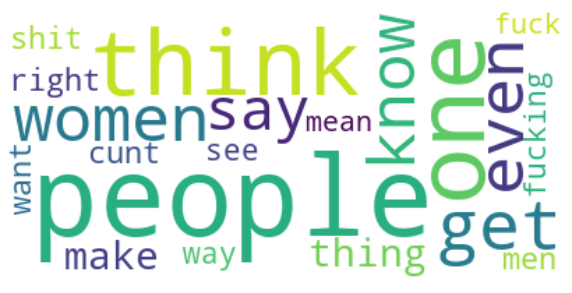

In [149]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_font_size=80, max_words=20)

#text has to be one single string
all_text =' '.join([txt for txt in df.loc[:,'text']]).lower()
wordcloud.generate(all_text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Top Unigrams 

In [150]:
def get_top_n_unigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1, 1), stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

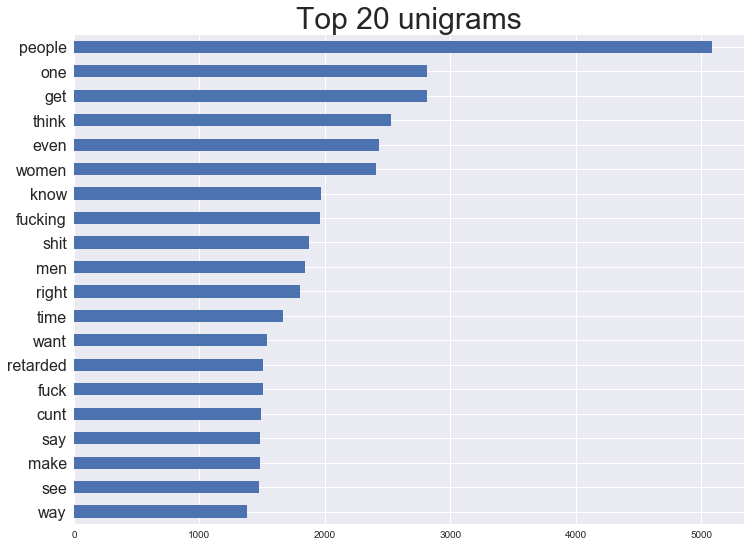

In [151]:
common_words = get_top_n_unigram(df.loc[:,'text'], 20)

unigram_df = pd.DataFrame(common_words, columns = ['text' , 'count'])

plt.figure(figsize=(12, 9));
unigram_df.groupby('text').sum()['count'].sort_values(ascending=True).plot(
    kind='barh');
plt.ylabel('');
plt.title('Top 20 unigrams', fontdict={'fontsize': 30});
#set large enough font size for ytick labels 
plt.gca().tick_params(axis='y', labelsize=16);

In [152]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

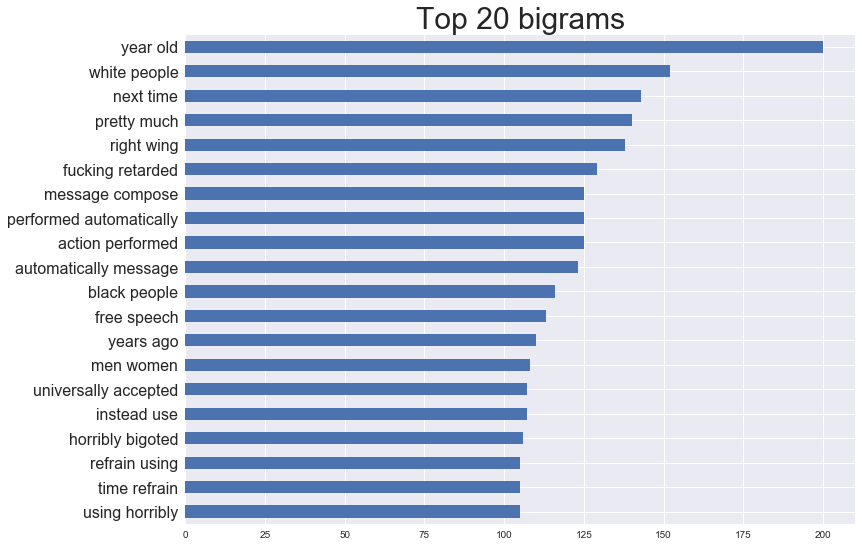

In [153]:
common_words = get_top_n_bigram(df.loc[:,'text'], 20)

bigram_df = pd.DataFrame(common_words, columns = ['text' , 'count'])

plt.figure(figsize=(12, 9));
bigram_df.groupby('text').sum()['count'].sort_values(ascending=True).plot(
    kind='barh');
plt.ylabel('');
plt.title('Top 20 bigrams', fontdict={'fontsize': 30});
#set large enough font size for ytick labels 
plt.gca().tick_params(axis='y', labelsize=16);

### Sentiment Analysis

In [68]:
from textblob import TextBlob

def get_polarity(x):
    blob = TextBlob(x)
    return blob.polarity

def get_subjectivity(x):
    blob = TextBlob(x)
    return blob.subjectivity

In [103]:
#looking at a comment sentiment
blob = TextBlob(df.loc[876, 'text'])
print(blob, df.loc[876, 'response'])
blob.sentiment

1. Perfect example of a high maintenance, self-centered, manipulative cunt.
2. 	Name checks out.
3. 		T R O L L
 ['Hey There, sexist comments and views are rude and unwelcome. Please respect woman and refrain from these type of comments. Thank you', 'Using words that profanely refer to parts of a person of a specific gender are neither productive nor careful.', 'Such mindless and debasing use the "c---" term is hateful and so forbidden here.']


Sentiment(polarity=0.58, subjectivity=0.77)

In [95]:
#looking at a comment sentiment
blob = TextBlob(df.loc[3400, 'text'])
print(blob)
blob.sentiment

1. There is no reason to think that the teacher had any hand in this. 
2. 	Yeah I'm not really a fan of putting her name on blast like this, but there's no reason to think she *didn't* have any hand in this. Teachers unions are incredibly powerful, and Gillum promised to give them the world. When it comes to the corruption of Democrats, there are very little coincidences, and they are VERY organized.
3. 		Innocent until proven guilty.  Get the fuck outta here with that shit.  It's that same type of thinking that they used to try to drag down Kavanaugh. 
4. 			Wow chill out kiddo. It's called reasonable suspicion. I never said to arrest the lady. The track record of Browards elections allows for skepticism...



Sentiment(polarity=-0.03209325396825397, subjectivity=0.5239087301587301)

In [75]:
#assign polarity and subjectivity for each comment
df['polarity'] = df['text'].map(get_polarity)
df['subjectivity'] = df['text'].map(get_subjectivity)

In [100]:
df[df['polarity'] > 0.5].head(10)

,id,text,hate_speech_idx,response,polarity,subjectivity
220,1. du4qy7b\n,1. Well done dude lol what a cunt.\n,[1],['My son is like this. He can joke for hours o...,0.800000,0.700000
241,1. dxhtmho\n,"1. Yes, she's a cunt... but, honestly, what do...",[1],"['Hey There, sexist comments and views are rud...",0.600000,0.900000
264,1. e0niszf\n2. \te0o6c5r\n3. \t\te0q8d49\n,"1. Even the most inbred, half-retarded redneck...",NaN,NaN,0.523571,0.558571
310,1. e7ubnwg\n,1. Heh nice. Quantum faggotry.\n,[1],['Please refrain from using hateful homophobic...,0.600000,1.000000
329,1. e7ju9zt\n,"1. ""Because I've done nothing of any real bene...",[1],['Out of respect for your fellow female Reddit...,0.533333,0.500000
512,1. e5yrgv3\n2. \te5ysnzn\n,1. Flipp is an app that does this (links coupo...,[2],"[""Name calling shows one's true character."", '...",0.650000,0.775000
612,1. e960sct\n,"1. They've got a really good point here, I'll ...",[1],"[""You using a person's race as an insult only ...",0.600000,0.744444
856,1. e7drifr\n,"1. always be suspicious of someone with a ""hol...",NaN,NaN,0.607143,0.785714
876,1. dvpsdqz\n2. \tdvpzhar\n3. \t\tdvr73w5\n,"1. Perfect example of a high maintenance, self...",[1],"['Hey There, sexist comments and views are rud...",0.580000,0.770000
980,1. e87o38y\n2. \te882vxd\n,1. Reclaim it? You never lost it!\n2. \tIt's a...,[2],"[""Its inappropriate to use 'dyke' as its a dir...",0.650000,0.750000


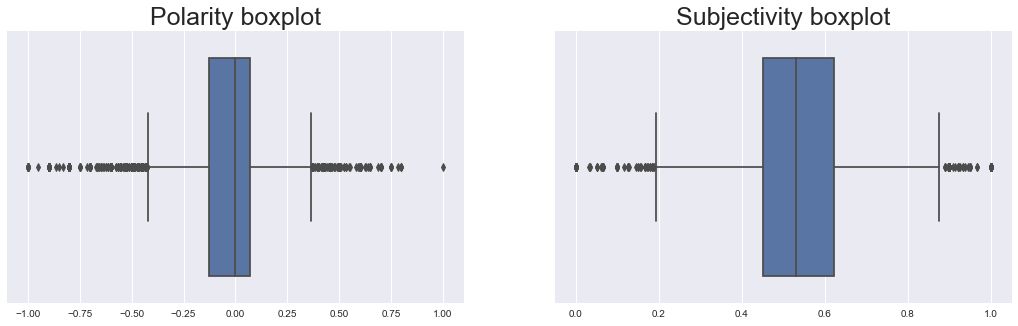

In [147]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5))

sns.boxplot(data=df, x=['polarity'], ax=ax1);
sns.boxplot(data=df, x=['subjectivity'], ax=ax2);
ax1.set_title('Polarity boxplot', size=25);
ax2.set_title('Subjectivity boxplot', size=25);

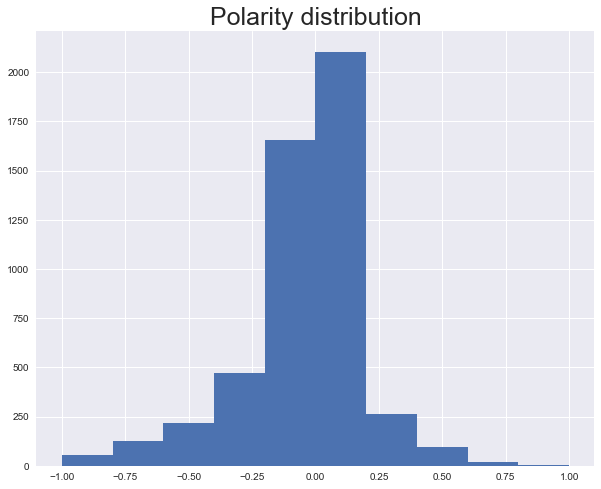

In [94]:
plt.figure(figsize=(10,8))
plt.hist(df['polarity']);
plt.title('Polarity distribution', fontdict={'fontsize': 25});

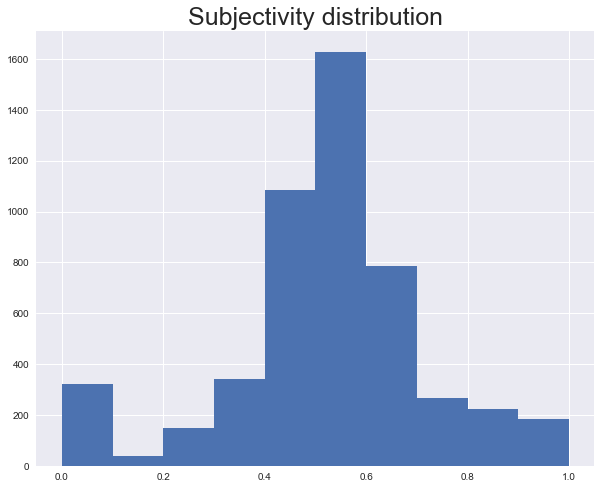

In [105]:
plt.figure(figsize=(10,8))
plt.hist(df['subjectivity']);
plt.title('Subjectivity distribution', fontdict={'fontsize': 25});

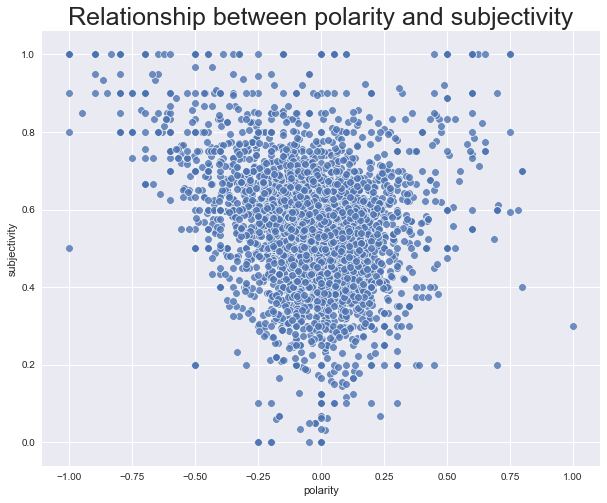

In [109]:
plt.figure(figsize=(10,8));
ax = sns.scatterplot(df['polarity'], df['subjectivity'], s=60, alpha=0.8);
plt.title('Relationship between polarity and subjectivity', fontdict={'fontsize': 25});